In [ ]:
I have these equations for the BIG model:
dG/dt = m -sIG m is the meal input (glucose production) s is the insulin sensitivity (the effect of a unit of insulin in the removal rate of glucose) I is insulin level and G i glucose level
dI/dt = B·f(G) - gamma·I B is the level of beta-cells, f(G) is a function of glucose and gamma is the degradation rate of insulin
dB/dt = mu·B where mu = p - d; p is the production of beta-cells and d is the elimination of beta-cells

Thank you for providing the specific equations for the BIG model you're referring to. These equations offer a more detailed view of the interactions between Beta-cells, Insulin, and Glucose in the body. Let's break down each equation:

1. **Glucose Dynamics**:
   $\frac{dG}{dt} = m - sIG$
   - $G$ is the glucose level.
   - $I$ is the insulin level.
   - $m$ represents the meal input or glucose production rate.
   - $s$ is the insulin sensitivity, indicating the effectiveness of insulin in promoting glucose removal from the blood.

   This equation models the rate of change of glucose concentration, with glucose being added through meals and removed due to the action of insulin.

2. **Insulin Dynamics**:
   $\frac{dI}{dt} = B \cdot f(G) - \gamma \cdot I$
   - $B$ is the level of beta-cells.
   - $f(G)$ is a function of glucose, representing how glucose levels stimulate insulin production.
   - $\gamma$ is the degradation rate of insulin.

   This equation describes how insulin levels change over time, with production driven by beta-cell activity and glucose levels, and a natural degradation of insulin.

3. **Beta-cell Dynamics**:
   $\frac{dB}{dt} = \mu \cdot B$
   Where $\mu = p - d$
   - $B$ is the level of beta-cells.
   - $p$ is the production rate of beta-cells.
   - $d$ is the elimination rate of beta-cells.

   This equation models the growth or decline of beta-cell population, considering both the production and elimination of beta-cells.

The function $f(G)$ in the insulin dynamics equation is particularly important as it encapsulates the response of beta-cells to glucose levels. This function is often modeled to reflect the physiological reality that beta-cells increase insulin production as glucose levels rise, but there's a limit to how much insulin they can produce.

These equations together form a dynamic model that can be used to simulate how glucose and insulin levels in the body respond to various factors, such as food intake, insulin sensitivity, and the health of beta-cells. This model is particularly useful in understanding diseases like diabetes, where these dynamics are disrupted.

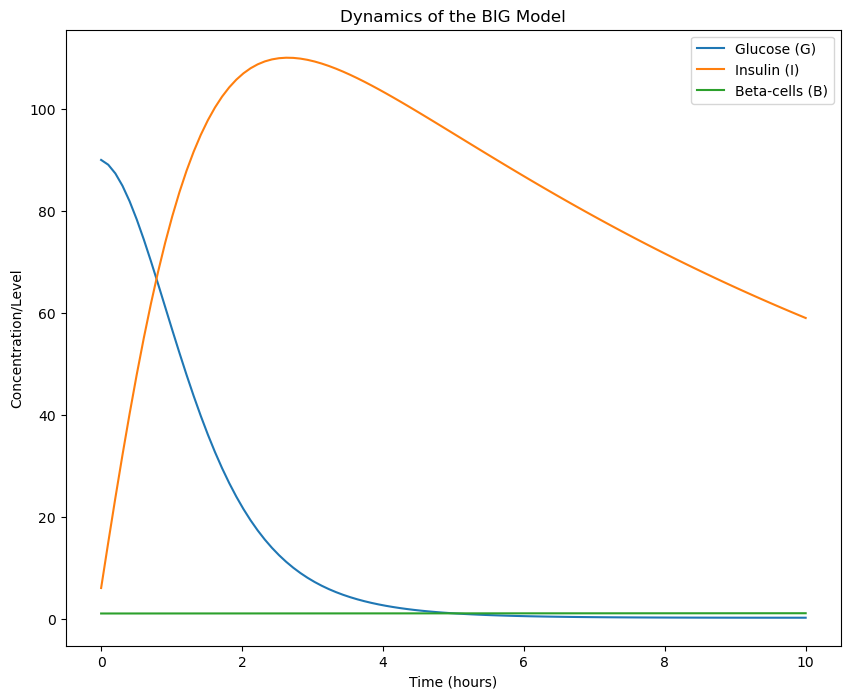

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODEs for the BIG model
def BIG_model(y, t, m, s, B, gamma, p, d):
    G, I, B = y
    f_G = G  # Assuming a linear relationship for f(G)
    dGdt = m - s * I * G
    dIdt = B * f_G - gamma * I
    dBdt = (p - d) * B
    return [dGdt, dIdt, dBdt]

# Initial conditions
G0 = 90    # Initial glucose level (mg/dL)
I0 = 6     # Initial insulin level (µU/mL)
B0 = 1     # Initial beta-cell level (arbitrary units)

# Parameters
m = 0.1    # Meal input (glucose production rate)
s = 0.01   # Insulin sensitivity
gamma = 0.1 # Degradation rate of insulin
p = 0.01   # Production rate of beta-cells
d = 0.005  # Elimination rate of beta-cells

# Time points (e.g., 0 to 100 hours)
t = np.linspace(0, 10, 100)

# Solve ODEs
solution = odeint(BIG_model, [G0, I0, B0], t, args=(m, s, B0, gamma, p, d))

# Plot results
plt.figure(figsize=(10, 8))
plt.plot(t, solution[:, 0], label='Glucose (G)')
plt.plot(t, solution[:, 1], label='Insulin (I)')
plt.plot(t, solution[:, 2], label='Beta-cells (B)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration/Level')
plt.title('Dynamics of the BIG Model')
plt.legend()
plt.show()


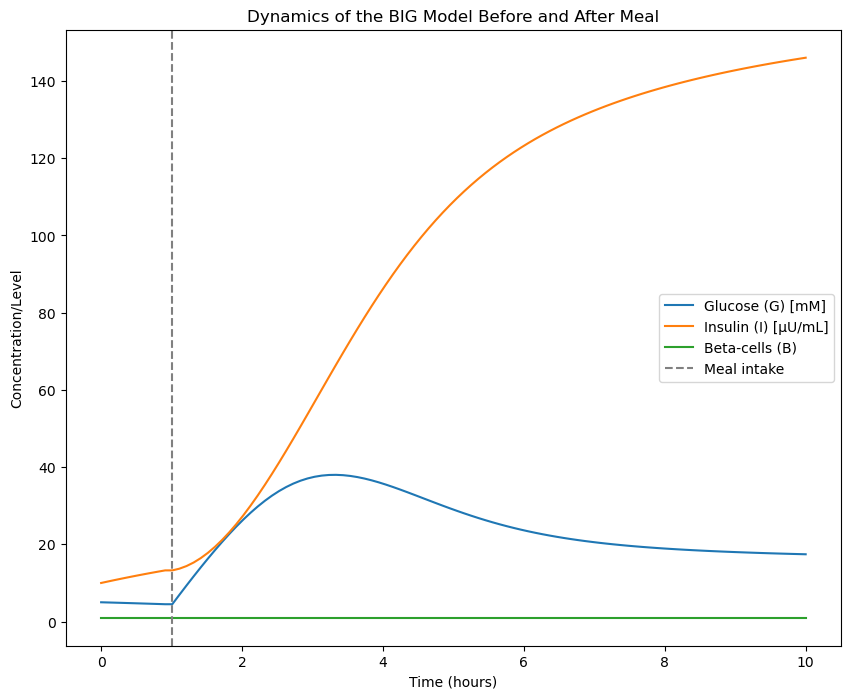

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODEs for the BIG model
def BIG_model(y, t, m, s, B, gamma, p, d):
    G, I, B = y
    f_G = G  # Assuming a linear relationship for f(G)
    dGdt = m - s * I * G
    dIdt = B * f_G - gamma * I
    dBdt = (p - d) * B
    return [dGdt, dIdt, dBdt]

# Initial conditions
G0 = 5.0    # Initial glucose level (mM), typical fasting level
I0 = 10     # Initial insulin level (µU/mL), assumed typical fasting level
B0 = 1.0    # Initial beta-cell level (arbitrary units), assuming a healthy baseline

# Parameters with physiological meaning
m = 0       # Meal input (glucose production rate), starts at 0
s = 0.01    # Insulin sensitivity (1/mM/minute)
gamma = 0.1 # Degradation rate of insulin (1/minute)
p = 0.01    # Production rate of beta-cells
d = 0.01    # Elimination rate of beta-cells

# Time points (e.g., 0 to 10 hours)
t = np.linspace(0, 10, 100)  # 10 hours simulation

# Simulate before meal input (first 1 hour)
solution_before_meal = odeint(BIG_model, [G0, I0, B0], t[:10], args=(m, s, B0, gamma, p, d))

# Update meal input to simulate after meal (9 hours)
m = 25.0  # Meal input (assuming a standard meal)
solution_after_meal = odeint(BIG_model, solution_before_meal[-1], t[10:], args=(m, s, B0, gamma, p, d))

# Combine solutions
solution = np.concatenate((solution_before_meal, solution_after_meal))

# Plot results
plt.figure(figsize=(10, 8))
plt.plot(t, solution[:, 0], label='Glucose (G) [mM]')
plt.plot(t, solution[:, 1], label='Insulin (I) [µU/mL]')
plt.plot(t, solution[:, 2], label='Beta-cells (B)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration/Level')
plt.title('Dynamics of the BIG Model Before and After Meal')
plt.axvline(x=1, color='grey', linestyle='--', label='Meal intake')
plt.legend()
plt.show()


In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODEs for the BIG model
# def BIG_model(y, t, m, s, B, gamma, p, d):
#     G, I, B = y
#     f_G = G  # Assuming a linear relationship for f(G)
#     dGdt = m - s * I * G
#     dIdt = B * f_G - gamma * I
#     dBdt = (p - d) * B
#     return [dGdt, dIdt, dBdt]

def BIG_model(y, t, m, s, B, gamma, p, d):
    #internal parameters for the Hill-type function
    # f max (Maximum Insulin Production Rate): This value should be high enough to represent the maximum rate at which insulin can be produced by the beta-cells. A physiologically realistic range might be between 20 and 100 µU/mL/min
    # K (Glucose Concentration for Half-Maximal Effect): This is the glucose level at which the insulin production is half of fmax . It should be set around a typical postprandial (after meal) glucose concentration. A reasonable starting point could be in the range of 5 to 10 mM
    # n (Hill Coefficient): The Hill coefficient determines the steepness of the curve. A higher n makes the transition from increasing to decreasing insulin production more abrupt. Typical values for n in biological systems range from 1 to 4
    f_max = 10
    K = 8
    n = 2
    G, I, B = y
    f_G = f_max / (1 + (G/K)**n)  # Decreasing Hill-type function for f(G)
    dGdt = m - s * I * G
    dIdt = B * f_G - gamma * I
    dBdt = (p - d) * B
    return [dGdt, dIdt, dBdt]

def run_BIG_simulation(m, s, gamma, p, d):
    # Initial conditions
    G0 = 5.0    # Initial glucose level (mM)
    I0 = 10     # Initial insulin level (µU/mL)
    B0 = 1.0    # Initial beta-cell level

    # Time points (e.g., 0 to 10 hours)
    t = np.linspace(0, 10, 100)

    # Solve ODEs
    solution = odeint(BIG_model, [G0, I0, B0], t, args=(m, s, B0, gamma, p, d))

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.plot(t, solution[:, 0], label='Glucose (G) [mM]')
    plt.plot(t, solution[:, 1], label='Insulin (I) [µU/mL]')
    plt.plot(t, solution[:, 2], label='Beta-cells (B)')
    plt.xlabel('Time (hours)')
    plt.ylabel('Concentration/Level')
    plt.title('Dynamics of the BIG Model')
    plt.legend()
    plt.show()




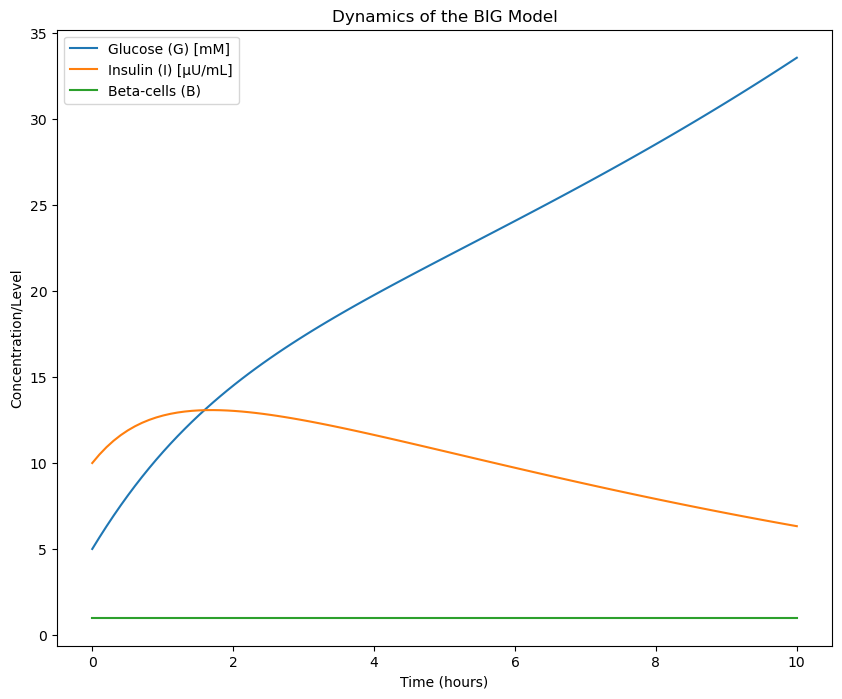

In [33]:
# Example usage
run_BIG_simulation(m=8, s=0.025, gamma=0.2, p=0.01, d=0.01)

In [133]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define a time-dependent meal function
def meal_input(t, m, meal_time, meal_duration):
    if meal_time <= t < meal_time + meal_duration:
        return m
    else:
        return 0

# Define the ODEs for the BIG model
def BIG_model(y, t, m, s, B, gamma, p, d, meal_time, meal_duration, I0):
    G, I, B = y
    f_max = 2   # Max insulin production rate (internal parameter)
    K = 8       # Glucose level for half-maximal effect (internal parameter)
    n = 4       # Hill coefficient (internal parameter)

    # Insulin production model changes after meal
    if t < meal_time:
        dIdt = 0  # Keeping insulin level constant before the meal
    else:
        f_G = 0.9*G
        #f_G = f_max / (1 + (G/K)**n)  # Decreasing Hill-type function for f(G) after meal
        dIdt = B * f_G - gamma * I

    current_m = meal_input(t, m, meal_time, meal_duration)  # Get current meal input
    dGdt = current_m - s * I * G
    dBdt = (p - d) * B
    return [dGdt, dIdt, dBdt]

def run_BIG_simulation(m, s, gamma, p, d, meal_time, meal_duration, I0):
    # Initial conditions
    G0 = 5.0    # Initial glucose level (mM), typical fasting level
    B0 = 1.0    # Initial beta-cell level (arbitrary units), assuming a healthy baseline

    # Time points (e.g., 0 to 10 hours)
    t = np.linspace(0, 10, 100)  # 10 hours simulation

    # Solve ODEs
    solution = odeint(BIG_model, [G0, I0, B0], t, args=(m, s, B0, gamma, p, d, meal_time, meal_duration, I0))

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.plot(t, solution[:, 0], label='Glucose (G) [mM]')
    #plt.plot(t, solution[:, 1], label='Insulin (I) [µU/mL]')
    plt.plot(t, solution[:, 2], label='Beta-cells (B)')
    plt.xlabel('Time (hours)')
    #plt.ylabel('Concentration/Level')
    plt.title('Dynamics of the BIG Model with Meal Input')
    plt.axvline(x=meal_time, color='grey', linestyle='--', label='Meal intake')
    plt.legend()
    plt.show()



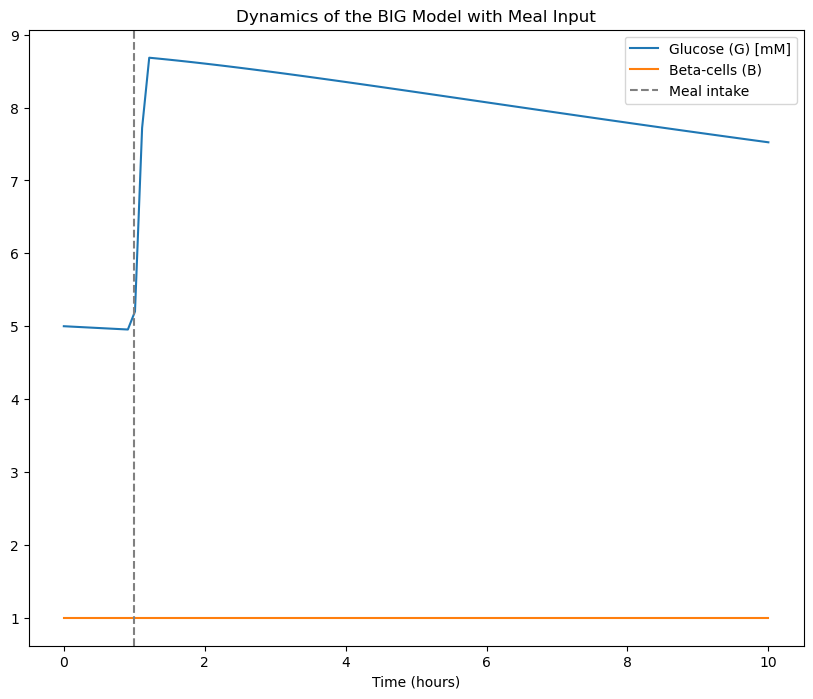

In [134]:
# Example usage
run_BIG_simulation(m=25.0, s=0.001, gamma=0.4, p=0.01, d=0.01, meal_time=1, meal_duration=0.15, I0=10)



In [135]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define a time-dependent meal function
def meal_input(t, m, meal_time, meal_duration):
    if meal_time <= t < meal_time + meal_duration:
        return m
    else:
        return 0

# Define the ODEs for the BIG model
def BIG_model(y, t, m, s, B, gamma, p, d, meal_time, meal_duration, I0):
    G, I, B = y
    f_max = 2   # Max insulin production rate (internal parameter)
    K = 8       # Glucose level for half-maximal effect (internal parameter)
    n = 4       # Hill coefficient (internal parameter)

    # Insulin production model changes after meal
    if t < meal_time:
        dIdt = 0  # Keeping insulin level constant before the meal
    else:
        f_G = 0.9*G
        dIdt = B * f_G - gamma * I

    current_m = meal_input(t, m, meal_time, meal_duration)  # Get current meal input
    dGdt = current_m - s * I * G
    dBdt = (p - d) * B
    return [dGdt, dIdt, dBdt]

def run_BIG_simulation_analysis(m, gamma, p, d, meal_time, meal_duration, I0):
    # Range of insulin sensitivities to analyze
    s_values = np.linspace(0.0005, 0.005, 10)  # Example range from very low to higher sensitivity

    # Initial conditions
    G0 = 5.0    # Initial glucose level (mM), typical fasting level
    B0 = 1.0    # Initial beta-cell level (arbitrary units), assuming a healthy baseline

    # Time points (0 to 10 hours)
    t = np.linspace(0, 10, 100)

    plt.figure(figsize=(10, 8))

    for s in s_values:
        # Solve ODEs for each s value
        solution = odeint(BIG_model, [G0, I0, B0], t, args=(m, s, B0, gamma, p, d, meal_time, meal_duration, I0))
        # Plot glucose levels
        plt.plot(t, solution[:, 0], label=f's = {s:.4f}')

    plt.xlabel('Time (hours)')
    plt.ylabel('Glucose (G) [mM]')
    plt.title('Glucose Levels for Different Insulin Sensitivities')
    plt.axvline(x=meal_time, color='grey', linestyle='--', label='Meal intake')
    plt.legend()
    plt.show()



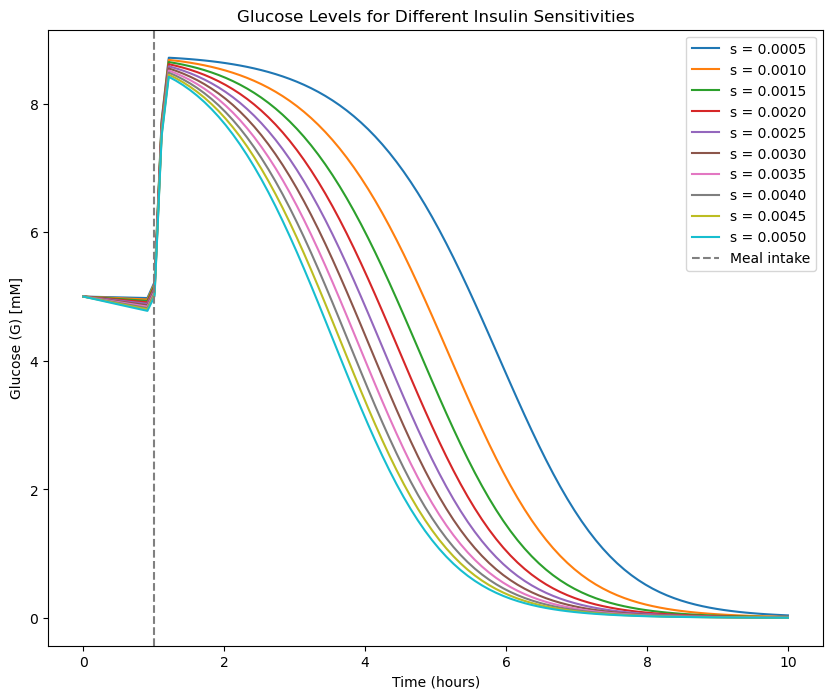

In [138]:
# Example usage with your parameters
run_BIG_simulation_analysis(m=25.0, gamma=0.4, p=1, d=0.01, meal_time=1, meal_duration=0.15, I0=10)
